In [1]:


import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
files_list = os.listdir("./results_1/")
#files_list = os.listdir("./Experiment_runs_10000/")



files_list = [os.path.join("./results_1/", filename) for filename in files_list]
files_csv_list = list(filter(lambda file_name: ".csv" in file_name, files_list))

In [3]:
files_csv_list

['./Experiment_runs_10000/kitti_00_uniform_5000.csv',
 './Experiment_runs_10000/kitti_00_usip_10000.csv',
 './Experiment_runs_10000/kitti_00_random_5000.csv',
 './Experiment_runs_10000/kitti_00_nosample_10000.csv',
 './Experiment_runs_10000/kitti_00_harris_5000.csv',
 './Experiment_runs_10000/kitti_00_sift_5000.csv']

In [4]:
extractor_dfs = {}
list_of_extractors = []
for csv_name in files_csv_list:
    extractor_name = csv_name.split('/')[-1].split('_')[2].split('.')[0]
    list_of_extractors.append(extractor_name)
    extractor_dfs[extractor_name] =  pd.read_csv(csv_name)    

FileNotFoundError: [Errno 2] No such file or directory: './Experiment_runs_10000/kitti_00_uniform_5000.csv'

In [5]:
list_of_extractors

['uniform']

In [6]:
extractor_dfs[list_of_extractors[0]]

KeyError: 'uniform'

In [16]:
feature_names =["KP_Extract",	"Matching",	"KP_count",	"ATE"]

In [17]:
extractor_dfs[list_of_extractors[0]]

,Unnamed: 0,KP_Extract,Matching,KP_count,ATE
0,0,0.001125,0.000000,10000,0.856034
1,1,0.000774,0.347227,10000,1.064904
2,2,0.000765,0.046213,10000,1.231554
3,3,0.000477,0.050702,10000,1.181629
4,4,0.000721,0.043143,10000,1.137836
...,...,...,...,...,...
114,114,0.000864,0.083601,10000,9.036127
115,115,0.000627,0.086328,10000,9.137593
116,116,0.000662,0.098333,10000,9.238151
117,117,0.000861,0.079185,10000,9.339114


In [18]:
summary_values_extractors = {}

for extractor in extractor_dfs:
    summary_values_extractors[extractor]={}
    extractor_df = extractor_dfs[extractor]
    summary_values_extractors[extractor][feature_names[0]+"_avg"] = extractor_df[feature_names[0]].mean()
    summary_values_extractors[extractor][feature_names[1]+"_avg"] = extractor_df[feature_names[1]].mean()
    summary_values_extractors[extractor]["Total_time"] = summary_values_extractors[extractor][feature_names[0]+"_avg"] +summary_values_extractors[extractor][feature_names[1]+"_avg"]

    summary_values_extractors[extractor][feature_names[3]+"_max"] = extractor_df[feature_names[3]].max()    
    summary_values_extractors[extractor][feature_names[2]+"_avg"] = extractor_df[feature_names[2]].mean()



In [19]:
extractors_summary = pd.DataFrame.from_dict(summary_values_extractors)

In [20]:
extractors_summary.T

,KP_Extract_avg,Matching_avg,Total_time,ATE_max,KP_count_avg
random,0.000625,0.078770,0.079395,9.440949,10000.000000
usip,0.246281,0.006424,0.252705,18.405294,512.000000
uniform,0.017041,0.077591,0.094632,12.509511,8192.000000
harris,0.107758,0.080185,0.187943,10.729168,10000.000000
nosample,0.000833,0.799808,0.800640,9.471637,121558.117647
sift,0.143771,0.065570,0.209342,12.639913,10000.000000


In [60]:
# fig, ax = plt.subplots()
# # hide axes

# fig.patch.set_visible(True)
# ax.axis('off')
# ax.axis('tight')

# ax.table(cellText=extractors_summary.T.values, colLabels=extractors_summary.T.columns)

# fig.tight_layout()

# plt.savefig("table.png")
# plt.show()

In [21]:
x_labels = list(extractors_summary.keys())
y_labels = list(extractors_summary.T.keys())

In [25]:
y_labels

['KP_Extract_avg', 'Matching_avg', 'Total_time', 'ATE_max', 'KP_count_avg']

In [26]:
extractors_summary.T["KP_Extract_avg"]

random      0.000625
usip        0.246281
uniform     0.017041
harris      0.107758
nosample    0.000833
sift        0.143771
Name: KP_Extract_avg, dtype: float64

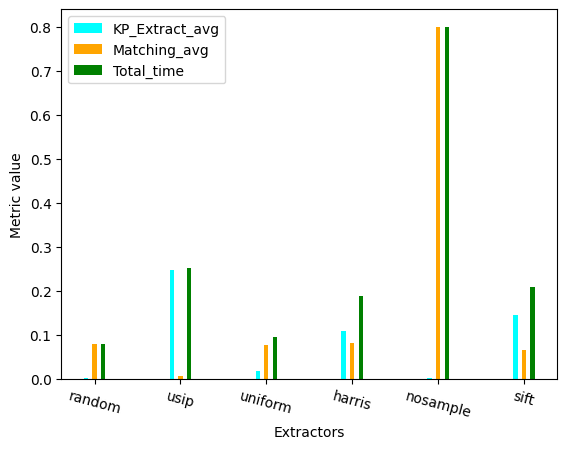

In [29]:
x = np.arange(6)
width = 0.05
  
# plot data in grouped manner of bar type
plt.bar(x-0.1, extractors_summary.T["KP_Extract_avg"], width, color='cyan')
plt.bar(x, extractors_summary.T["Matching_avg"], width, color='orange')
plt.bar(x+0.1, extractors_summary.T["Total_time"], width, color='green')
#plt.bar(x+0.2, extractors_summary.T["ATE_max"], width, color='blue')
plt.xticks(x, x_labels, rotation=-15)
plt.xlabel("Extractors")
plt.ylabel("Metric value")
plt.legend(y_labels)
#plt.show()

plt.savefig("average_time_plot.png")

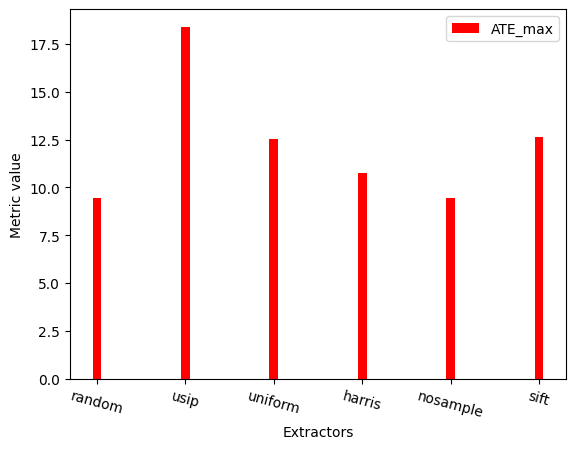

In [30]:
x = np.arange(6)
width = 0.1
  
# plot data in grouped manner of bar type
#plt.bar(x-0.1, extractors_summary.T["KP_Extract_avg"], width, color='cyan')
plt.bar(x, extractors_summary.T["ATE_max"], width, color='red')
#plt.bar(x+0.1, extractors_summary.T["Total_time"], width, color='green')
#plt.bar(x+0.2, extractors_summary.T["ATE_max"], width, color='blue')
plt.xticks(x, x_labels, rotation=-15)
plt.xlabel("Extractors")
plt.ylabel("Metric value")
plt.legend(y_labels[3:])
#plt.show()

plt.savefig("ATE_plot.png")

In [31]:
extractor_ATEs = {}

for extractor in extractor_dfs:
    extractor_ATEs[extractor]={}
    extractor_df = extractor_dfs[extractor]
    extractor_ATEs[extractor] = extractor_df[feature_names[3]]

In [32]:
ates_df = pd.DataFrame.from_dict(extractor_ATEs)

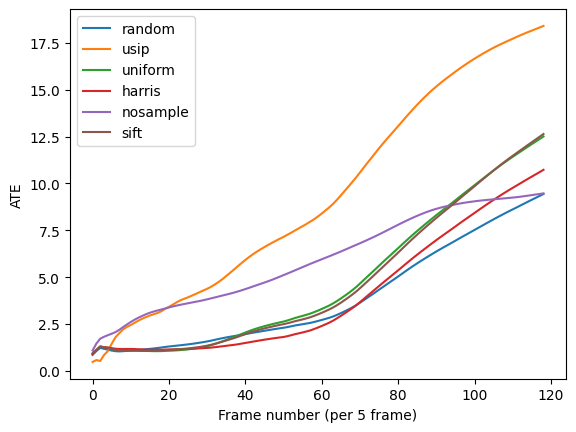

In [33]:
plt.plot(ates_df)
plt.xlabel("Frame number (per 5 frame)")
plt.ylabel("ATE")
plt.legend(x_labels)

plt.savefig("ate_per_frame.png")
